In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

Example Data:
- An Experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% patients 65 or older experienced side effects.
- Around 95% patients under 65 experienced no side effects.

In [4]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_samples[:10]

[47, 97, 18, 73, 31, 66, 22, 69, 46, 69]

In [6]:
train_labels[:10]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [7]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_samples, train_labels = shuffle(train_samples, train_labels)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [10]:
scaled_train_samples[:10]

array([[0.79310345],
       [0.7816092 ],
       [0.93103448],
       [0.05747126],
       [0.64367816],
       [0.82758621],
       [0.88505747],
       [0.98850575],
       [0.59770115],
       [0.7816092 ]])

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [12]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.7173 - accuracy: 0.4159 - val_loss: 0.7025 - val_accuracy: 0.2810
Epoch 2/30
189/189 - 0s - loss: 0.6897 - accuracy: 0.4280 - val_loss: 0.6745 - val_accuracy: 0.5905
Epoch 3/30
189/189 - 0s - loss: 0.6676 - accuracy: 0.5704 - val_loss: 0.6483 - val_accuracy: 0.6762
Epoch 4/30
189/189 - 0s - loss: 0.6456 - accuracy: 0.6407 - val_loss: 0.6263 - val_accuracy: 0.7048
Epoch 5/30
189/189 - 0s - loss: 0.6250 - accuracy: 0.6937 - val_loss: 0.6060 - val_accuracy: 0.7286
Epoch 6/30
189/189 - 0s - loss: 0.6050 - accuracy: 0.7206 - val_loss: 0.5851 - val_accuracy: 0.7476
Epoch 7/30
189/189 - 0s - loss: 0.5842 - accuracy: 0.7481 - val_loss: 0.5639 - val_accuracy: 0.7762
Epoch 8/30
189/189 - 0s - loss: 0.5619 - accuracy: 0.7772 - val_loss: 0.5414 - val_accuracy: 0.7810
Epoch 9/30
189/189 - 0s - loss: 0.5386 - accuracy: 0.7894 - val_loss: 0.5198 - val_accuracy: 0.8095
Epoch 10/30
189/189 - 0s - loss: 0.5151 - accuracy: 0.8095 - val_loss: 0.4982 - val_accuracy: 0.8333

In [16]:
test_labels = []
test_samples = []

In [17]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [19]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [21]:
predictions[:10]

array([[0.03760603, 0.962394  ],
       [0.9079    , 0.09210006],
       [0.08336739, 0.9166326 ],
       [0.18248042, 0.8175196 ],
       [0.04019124, 0.9598088 ],
       [0.9219219 , 0.07807814],
       [0.92571354, 0.07428648],
       [0.09235426, 0.90764576],
       [0.9240796 , 0.07592041],
       [0.10220189, 0.8977981 ]], dtype=float32)

In [23]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [24]:
rounded_predictions[:10]

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

# Confusion Matrix

In [25]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [26]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[195  15]
 [  9 201]]


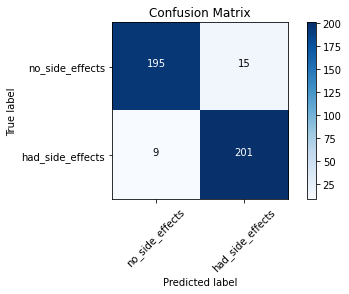

In [28]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Save and Load a model

In [29]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [30]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [31]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
# new_model.get_weights()

In [33]:
#new_model.optimizer